In this example, we will implement a simple example of active transport. This particular model is derived from work by Jönsson et al. (2006) describing the transport of auxin. We refer to it as "transport against the gradient" because it assumes that cells are somehow able to sense difference in auxin concentrations relative to their neighbors and relocate their auxin pumps to transport auxin towards cells of higher concentrations, i.e. the opposite direction of spontaneous diffusion/passive transport.

# Preparation

In [1]:
%matplotlib notebook

# Imports
We are obviously going to need multicell, but we are also going to need numpy to initialize the system with random noise.

In [2]:
import multicell
import numpy as np

# Problem definition

The tissue will be a 30x30x1 grid of cubic cells.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(10, 10, 1)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.31 s)


We define one variable called a.

In [4]:
sim.register_cell_variable("a")

We then define the differential equation of a. This requires defining some constants and their values.

*D_a* is the diffusion coefficient, and *T_a* is the active transport coefficient.

In [5]:
sim.set_constants({"D_a": 0.03, "T_a": 1.})

In this example, the differential equation uses two built-in functions of the simulation objects: `simulation.diffusion` and `simulation.transport_against_gradient`. These functions automatically compute the net flows due to diffusion and active transport, respectively, for all cells. They also help the Simulation object to integrate the system of differential equations efficiently by contributing to the determination of the structure of the Jacobian matrix, as mentioned in the example about diffusion. They can therefore not be replaced by any user-defined function. User-defined function should be used through the `Simulation._transport` function.

In [6]:
def da_dt(simulation, c_a, D_a, T_a, adjacency_matrix):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + simulation.transport_against_gradient(T_a, c_a, adjacency_matrix)

sim.set_ODE("a", da_dt)

## Initial conditions

If we started with perfectly uniform concentrations, there would be no differences in concentrations between cells at all, and the system would remain in that unstable steady state. To break this symmetry, we initialize the system with some random noise.

We first need to signal the simulation that all variables have been defined and that arrays can now be reserved for their values.

In [7]:
sim.initialize_cell_variables()

We then create a numpy aray of random values between 0.999 and 1.001 to serve as initial concentration values.

In [8]:
a0 = np.random.uniform(0.999, 1.001, sim.n_cells)
sim.set_cell_variable("a", a0)

## Duration

Finally, we set the duration of the simulation to $10^6$ (arb. units), which is long enough to reach the steady state.

In [9]:
#sim.set_duration(8e3)
#sim.set_time_steps(10, "log2")

## Rendering

We register a viewer that will display the concentrations of a.

In [10]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 17, "view": (90, -90), "axes": False})

# Visualization of the initial conditions

We can check that the tissue is initially uniform.

<IPython.core.display.Javascript object>


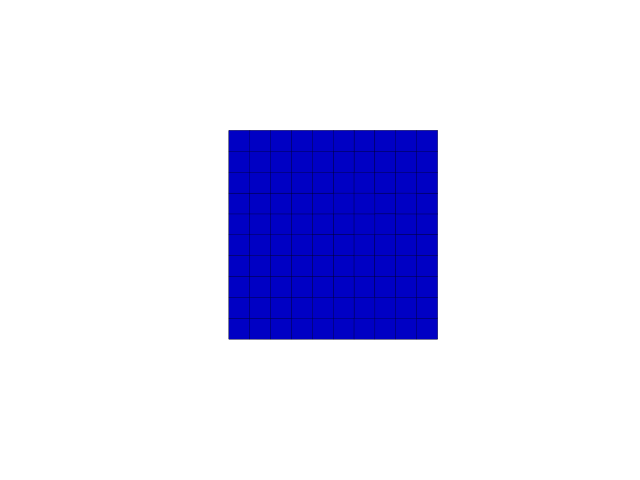

Time: 0.0
c_a: from 0.998311065039 to 1.00152397703


In [11]:
sim.renderer.display("c_a")

# Simulation

We can then run the simulation to obtain the steady state. On our computer (Intel Core i7), the simulation took 3 min.

Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.769989967346 seconds


<IPython.core.display.Javascript object>


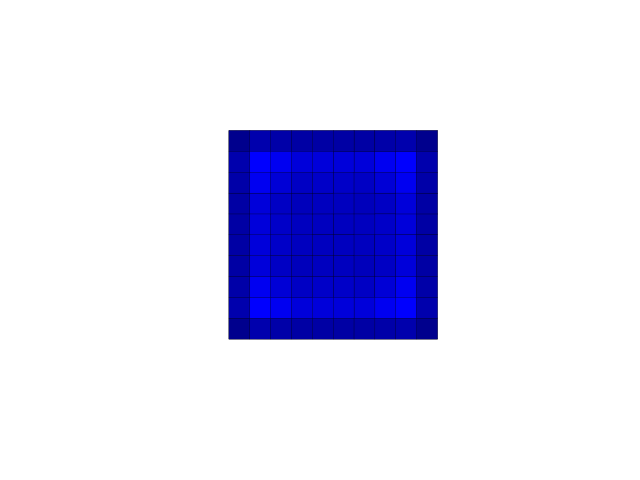

Time: 5.0
c_a: from 0.251023075311 to 1.89486941273
Jacobian computation: started
Jacobian computation: finished (0.01 s)
Integration of the ODE system: 0.46697807312 seconds


<IPython.core.display.Javascript object>


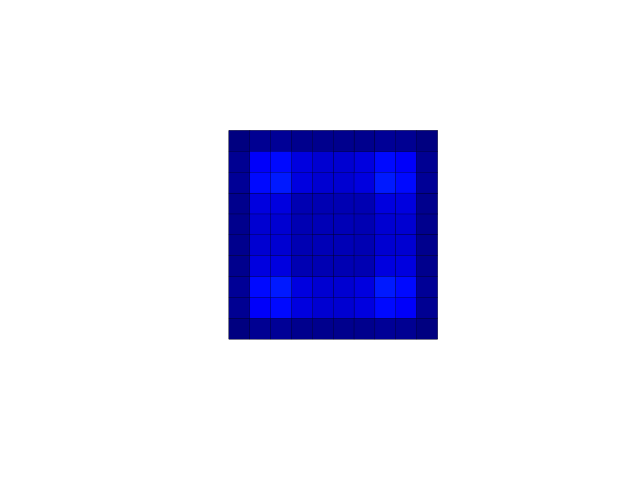

Time: 10.0
c_a: from 0.0621405253614 to 2.5400231255
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.737974882126 seconds


<IPython.core.display.Javascript object>


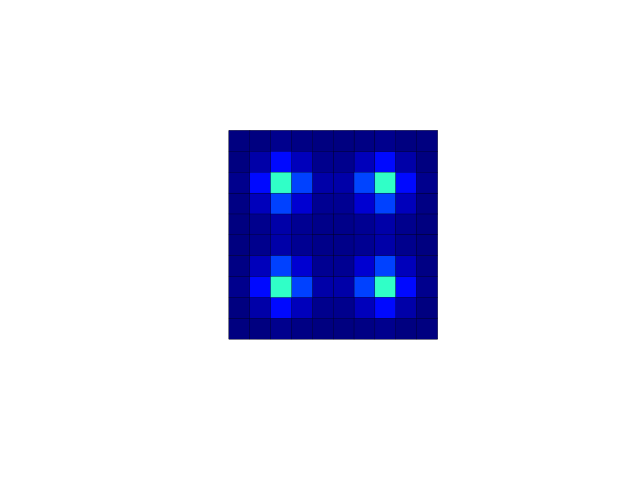

Time: 20.0
c_a: from 0.0096750413185 to 6.95359321866
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 1.6107840538 seconds


<IPython.core.display.Javascript object>


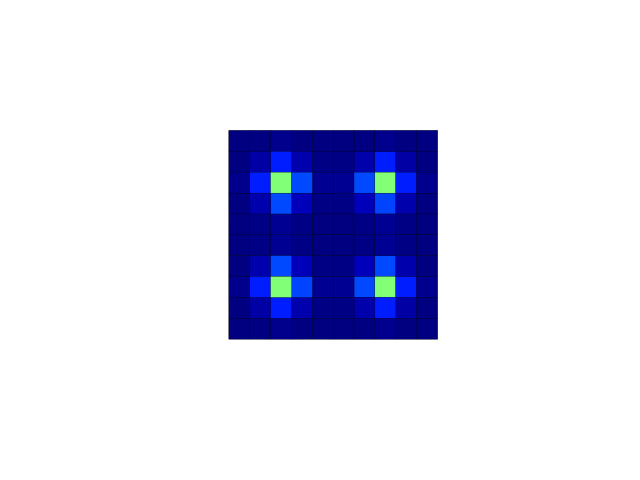

Time: 80.0
c_a: from 0.00574611002951 to 8.63199440631
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 81.7354099751 seconds


<IPython.core.display.Javascript object>


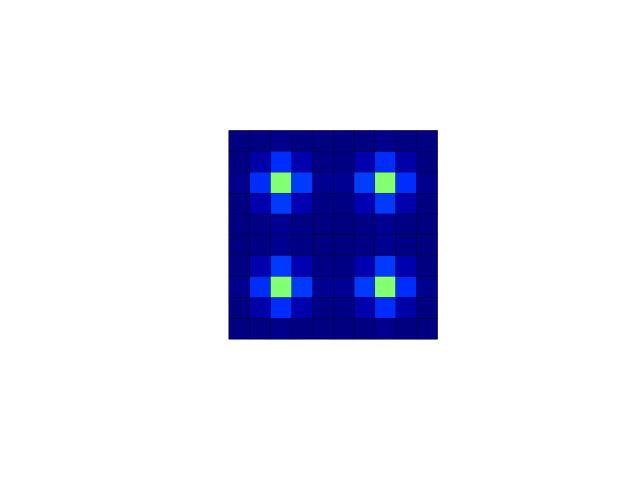

Time: 2000.0
c_a: from 0.00687401142192 to 8.68716442091
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 56.3292570114 seconds


<IPython.core.display.Javascript object>


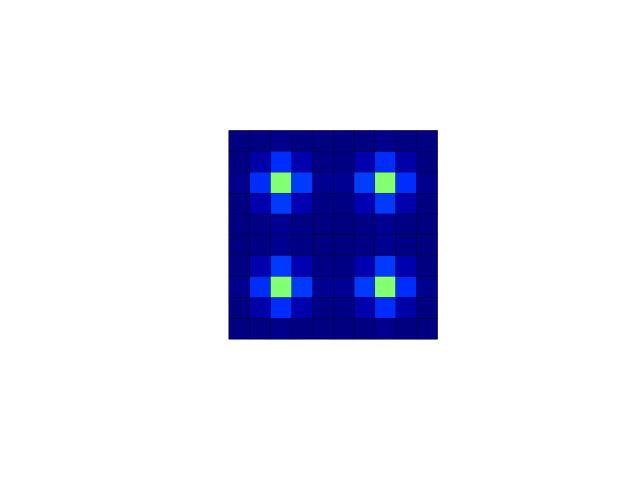

Time: 3000.0
c_a: from 0.00687228459983 to 8.69240468932
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 210.028666973 seconds


<IPython.core.display.Javascript object>


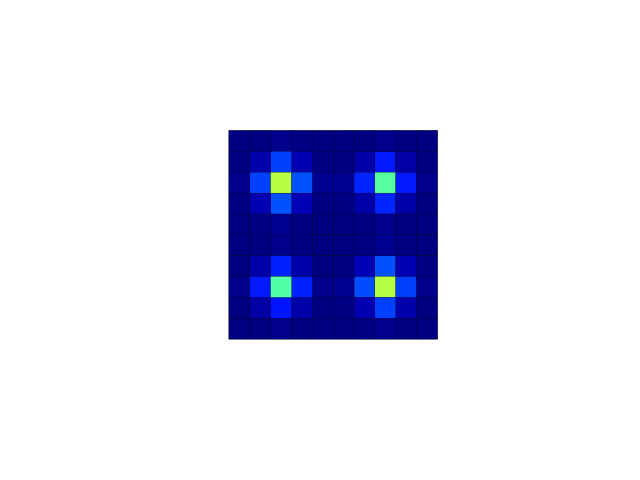

Time: 8000.0
c_a: from 0.00606816780227 to 9.7481023818
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 367.778281927 seconds


<IPython.core.display.Javascript object>


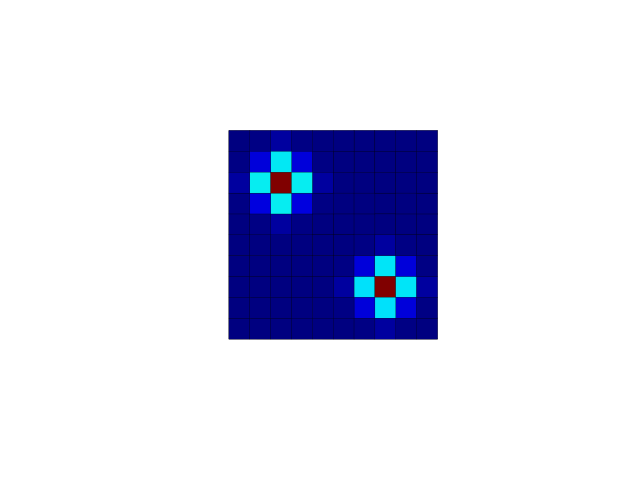

Time: 1008000.0
c_a: from 1.34386888205e-07 to 17.6825277562


In [12]:
sim.set_duration(5)
sim.simulate()
sim.set_duration(5)
sim.simulate()
sim.set_duration(10)
sim.simulate()
sim.set_duration(60)
sim.simulate()
sim.set_duration(1920)
sim.simulate()
sim.set_duration(1000)
sim.simulate()
sim.set_duration(5000)
sim.simulate()
sim.set_duration(1e6)
sim.simulate()

We can see the tissue is no longer uniform. Two islets of higher concentrations have appeared. This shows that transport against the gradient can create heterogeneity in a tissue.

The size of the islets is dependent on the ratio of the diffusion coefficient to the transport coefficient. The stronger the diffusion, the larget the islets.

Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 244.902264833 seconds


<IPython.core.display.Javascript object>


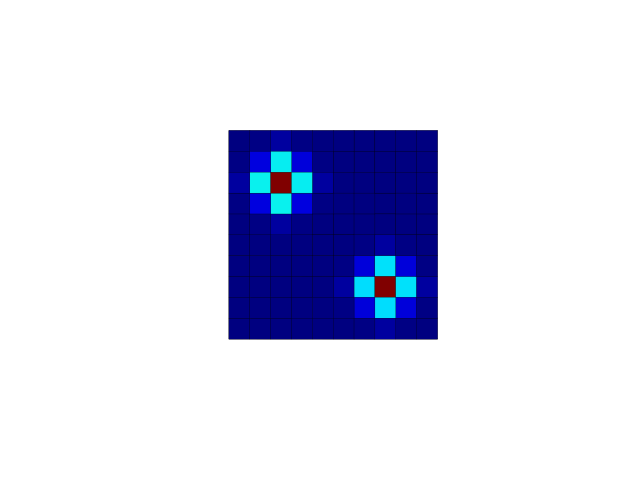

Time: 4008000.0
c_a: from 1.3435012358e-07 to 17.8054532861


In [15]:
sim.set_duration(1e6)
sim.simulate()